In [15]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
data = pd.read_csv("tips.csv")

In [17]:
# question1

null_values = data.isnull().sum()
column_info = data.info()
descriptive_stats = data.describe()

null_values, column_info, descriptive_stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


(total_bill    0
 tip           0
 sex           0
 smoker        0
 day           0
 time          0
 size          0
 dtype: int64,
 None,
        total_bill         tip        size
 count  244.000000  244.000000  244.000000
 mean    19.785943    2.998279    2.569672
 std      8.902412    1.383638    0.951100
 min      3.070000    1.000000    1.000000
 25%     13.347500    2.000000    2.000000
 50%     17.795000    2.900000    2.000000
 75%     24.127500    3.562500    3.000000
 max     50.810000   10.000000    6.000000)

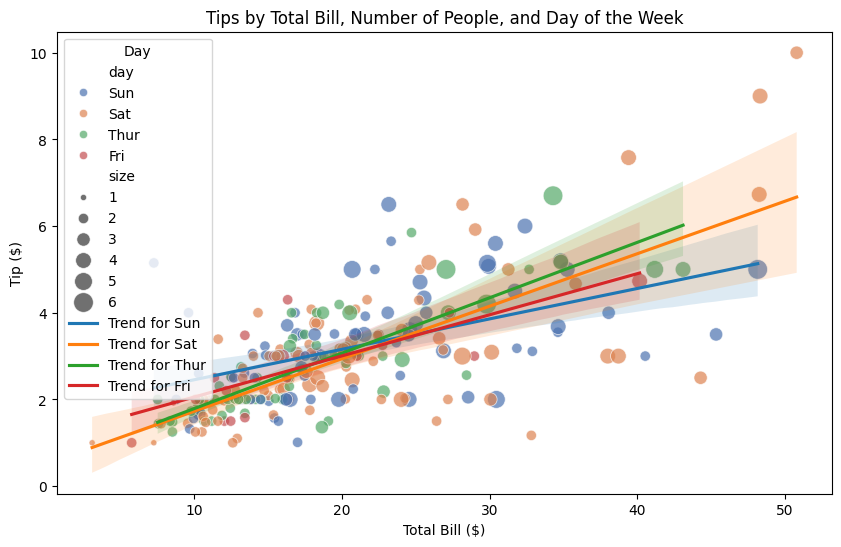

In [18]:
# question2

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='total_bill', y='tip', hue='day', size='size', palette='deep', sizes=(20, 200), alpha=0.7)

# Add trend lines for each day
days = data['day'].unique()
for day in days:
    subset = data[data['day'] == day]
    sns.regplot(data=subset, x='total_bill', y='tip', scatter=False, label=f'Trend for {day}')

plt.legend(title='Day')
plt.title('Tips by Total Bill, Number of People, and Day of the Week')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

plt.show()

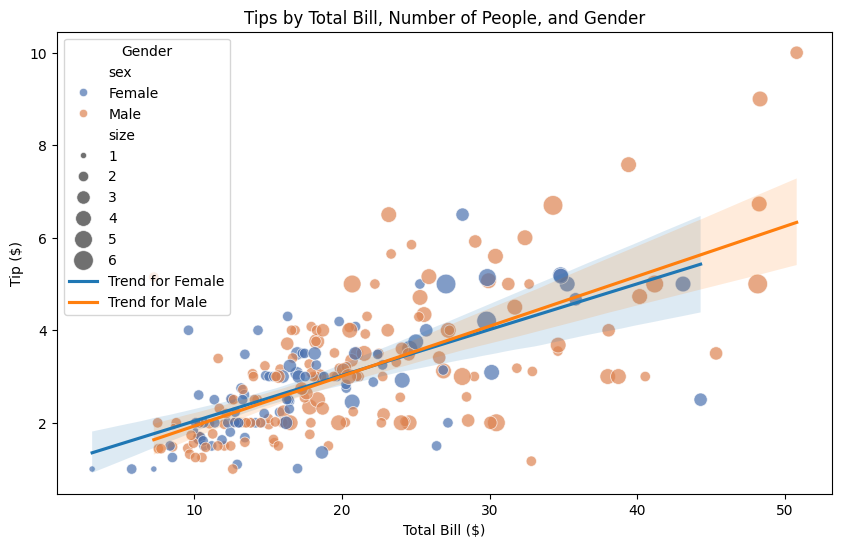

In [19]:
# question3

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='total_bill', y='tip', hue='sex', size='size', palette='deep', sizes=(20, 200), alpha=0.7)

# Add trend lines for each gender
genders = data['sex'].unique()
for gender in genders:
    subset = data[data['sex'] == gender]
    sns.regplot(data=subset, x='total_bill', y='tip', scatter=False, label=f'Trend for {gender}')

plt.legend(title='Gender')
plt.title('Tips by Total Bill, Number of People, and Gender')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

plt.show()


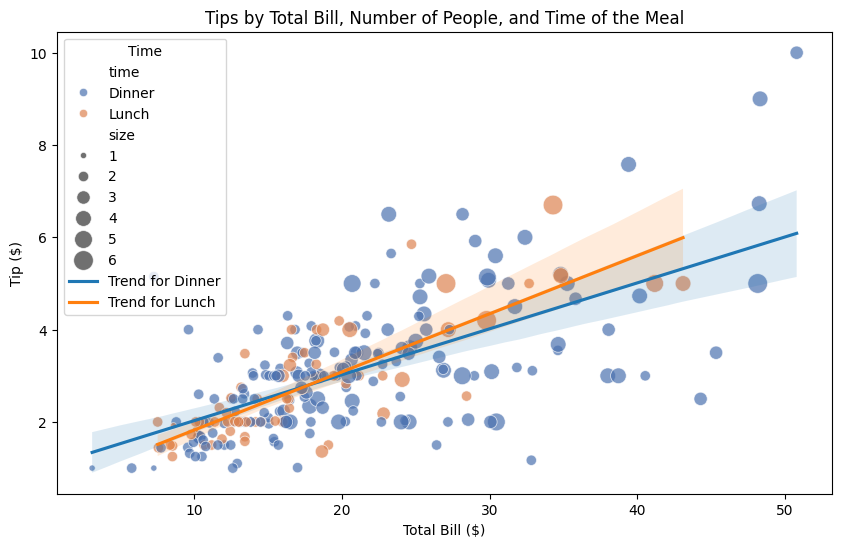

In [20]:
# question4

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=data, x='total_bill', y='tip', hue='time', size='size', palette='deep', sizes=(20, 200), alpha=0.7)

# Add trend lines for each time
times = data['time'].unique()
for time in times:
    subset = data[data['time'] == time]
    sns.regplot(data=subset, x='total_bill', y='tip', scatter=False, label=f'Trend for {time}')

plt.legend(title='Time')
plt.title('Tips by Total Bill, Number of People, and Time of the Meal')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')

plt.show()


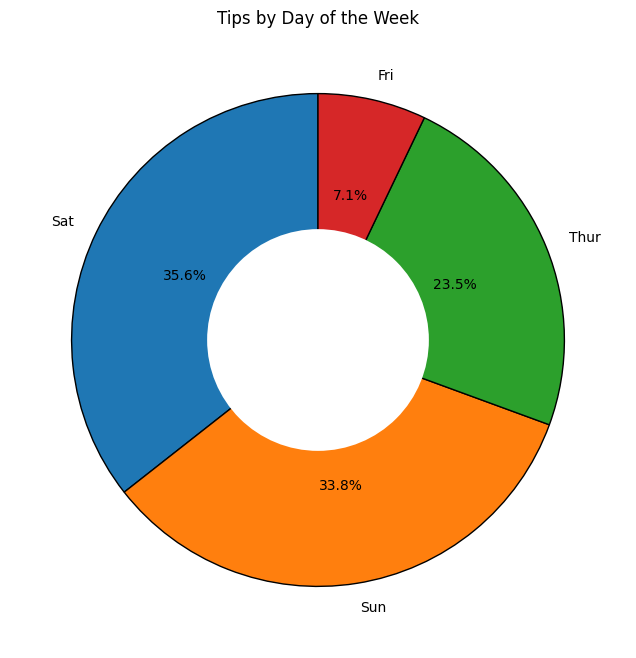

In [21]:
# question5

# sum of tips by day
tips_by_day = data.groupby('day')['tip'].sum().sort_values(ascending=False)

# donut chart for tips by day
plt.figure(figsize=(8, 8))
plt.pie(tips_by_day, labels=tips_by_day.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.gca().set_aspect('equal')  
plt.title('Tips by Day of the Week')

centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


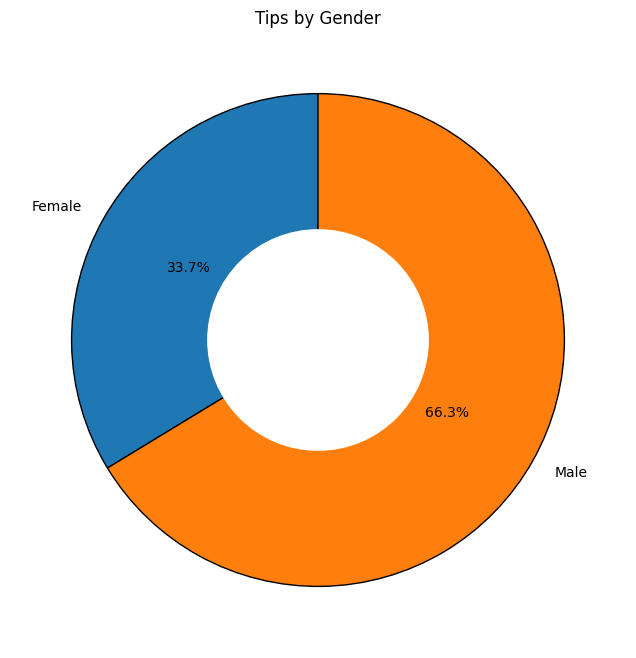

In [22]:
# question6

# sum of tips by gender
tips_by_gender = data.groupby('sex')['tip'].sum()

plt.figure(figsize=(8, 8))
plt.pie(tips_by_gender, labels=tips_by_gender.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.gca().set_aspect('equal')
plt.title('Tips by Gender')

centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


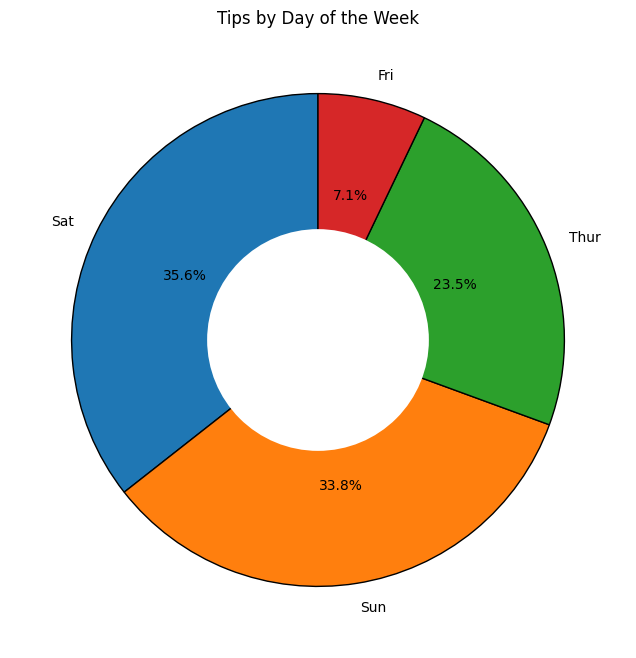

In [23]:
# question7

# sum of tips by day
tips_by_day = data.groupby('day')['tip'].sum().sort_values(ascending=False)

# donut chart for tips by day
plt.figure(figsize=(8, 8))
plt.pie(tips_by_day, labels=tips_by_day.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.gca().set_aspect('equal')  
plt.title('Tips by Day of the Week')

centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


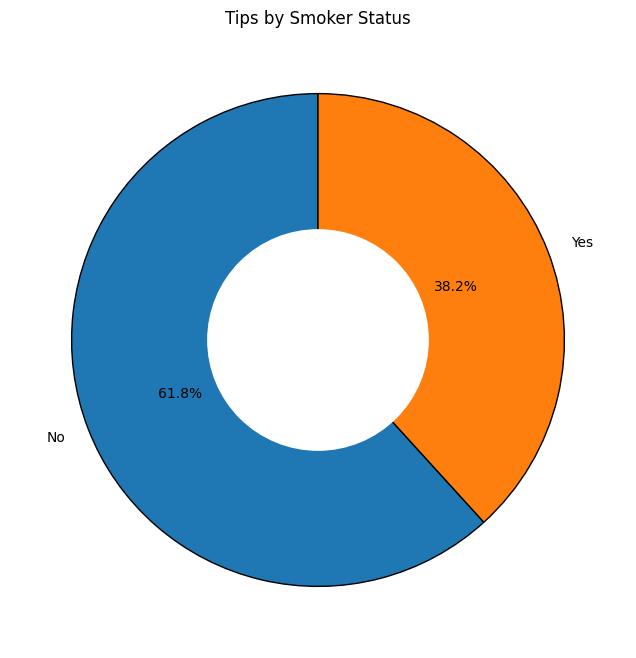

In [24]:
# question8

# sum of tips by smoker status
tips_by_smoker = data.groupby('smoker')['tip'].sum()

plt.figure(figsize=(8, 8))
plt.pie(tips_by_smoker, labels=tips_by_smoker.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.gca().set_aspect('equal')
plt.title('Tips by Smoker Status')

centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


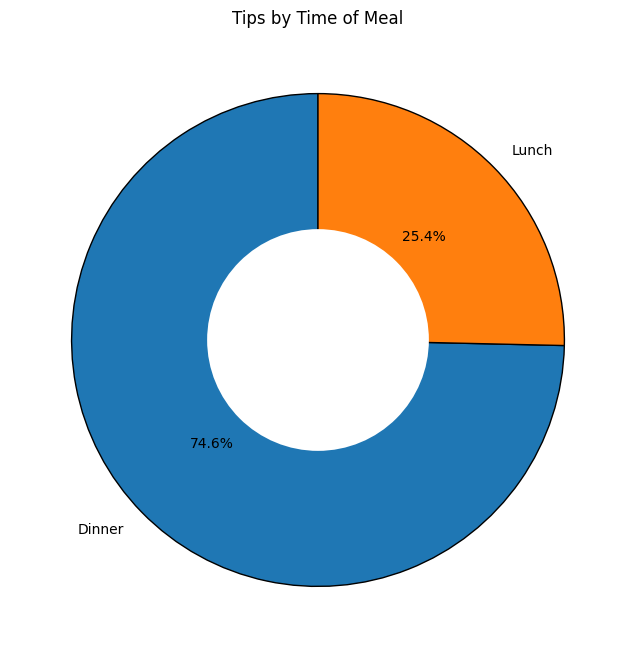

In [25]:
# question9

# sum of tips by time of the meal
tips_by_time = data.groupby('time')['tip'].sum()

plt.figure(figsize=(8, 8))
plt.pie(tips_by_time, labels=tips_by_time.index, autopct='%1.1f%%', startangle=90, wedgeprops={'edgecolor': 'black'})
plt.gca().set_aspect('equal')
plt.title('Tips by Time of Meal')

centre_circle = plt.Circle((0, 0), 0.45, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


In [26]:
# question10

# transform categorical variables into numerical values
data_transformed = data.copy()
data_transformed['sex'] = data_transformed['sex'].map({'Male': 0, 'Female': 1})
data_transformed['smoker'] = data_transformed['smoker'].map({'No': 0, 'Yes': 1})
data_transformed['day'] = data_transformed['day'].map({'Thur': 0, 'Fri': 1, 'Sat': 2, 'Sun': 3})
data_transformed['time'] = data_transformed['time'].map({'Lunch': 0, 'Dinner': 1})

print("Transformed Data:\n", data_transformed.head())


Transformed Data:
    total_bill   tip  sex  smoker  day  time  size
0       16.99  1.01    1       0    3     1     2
1       10.34  1.66    0       0    3     1     3
2       21.01  3.50    0       0    3     1     3
3       23.68  3.31    0       0    3     1     2
4       24.59  3.61    1       0    3     1     4


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# question11

# prepare the features and target
X = data_transformed.drop('tip', axis=1)
y = data_transformed['tip']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict the tips for the test set
y_pred = model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.6963090766605349
R-squared: 0.4429399687489898


In [28]:
# question12

# define the input data for prediction
input_data = {
    'total_bill': 24.50,
    'sex': 1,    
    'smoker': 0, 
    'day': 0,    
    'time': 1,   
    'size': 4    
}

# convert the input data to a DataFrame
input_df = pd.DataFrame([input_data])

# predict the tip amount using the trained model
predicted_tip = model.predict(input_df)

# output the predicted tip
print("Predicted Tip:", predicted_tip)

Predicted Tip: [3.71285712]
